In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv(r"C:\Users\user\Desktop\Datas\Country-data.csv")
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
data.shape

(167, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
data.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [8]:
data.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


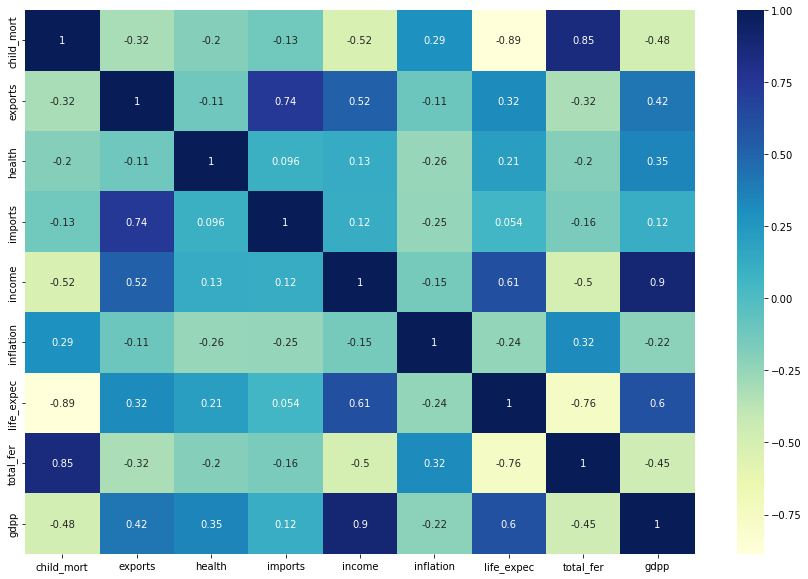

In [9]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.show()

#GDPP and income are highly correlated. Number of children born per woman is highly correlated with child mortality,
which makes sense. Imports and exports are highly correlated as expected. Life expectancy is highly negatively correlated 
with child mortality. Life expenctancy is correlated with income Life expectancy is correlated with GDPP

We can safely drop life expectancy, total fertility and income as they are all very highly correlated to other features

In [10]:
# drop the correlated feature
data1 = data.drop(columns = ['income', 'country', 'life_expec', 'total_fer'])

In [11]:
#Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data1)

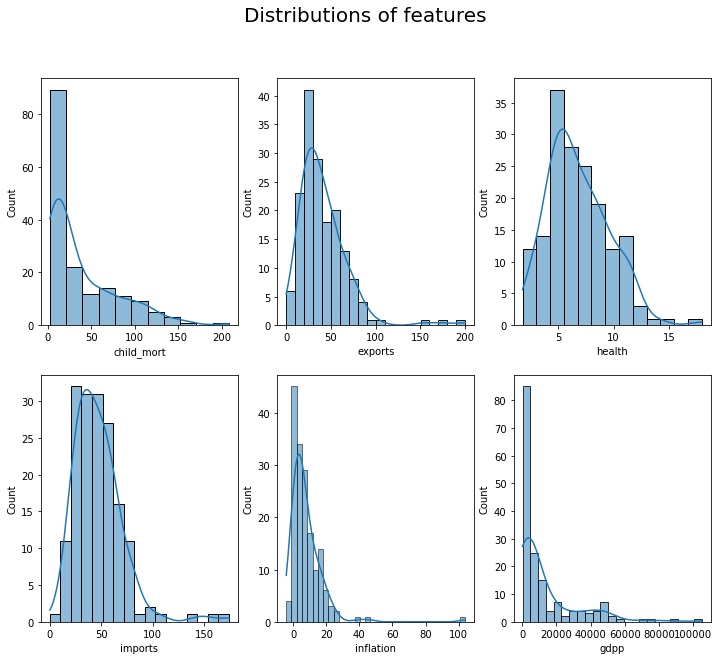

In [12]:
#plot some graphs to check feature distributions

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12,10))
ax = ax.flatten() #allows axes to be looped over
plt.suptitle("Distributions of features", fontsize=20)
for x, i in enumerate(data1.columns):
    sns.histplot(data1[i], ax = ax[x], kde=True, palette="Blues")

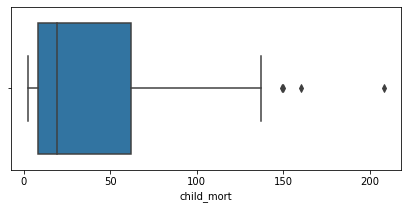

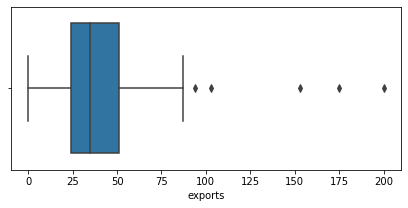

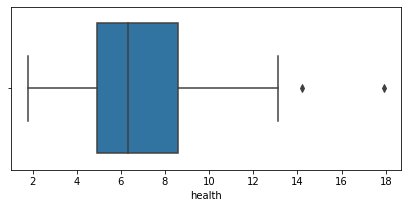

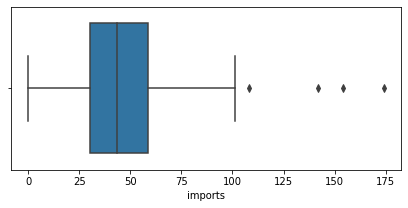

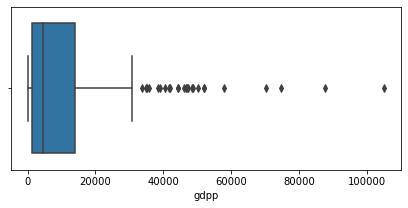

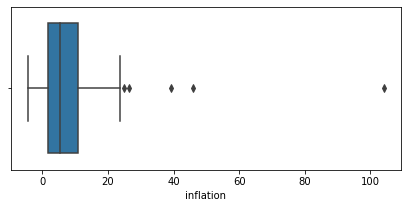

In [13]:
plt.figure(figsize=(7,3))
sns.boxplot(x=data1['child_mort'])
plt.figure(figsize=(7,3))
sns.boxplot(x=data1['exports'])
plt.figure(figsize=(7,3))
sns.boxplot(x=data1['health'])
plt.figure(figsize=(7,3))
sns.boxplot(x=data1['imports'])
plt.figure(figsize=(7,3))
sns.boxplot(x=data1['gdpp'])
plt.figure(figsize=(7,3))
sns.boxplot(x=data1['inflation'])
plt.show()


In [15]:
from sklearn.cluster import KMeans
wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 123)
    kmeans.fit(data_scaled) 
    wcss.append(kmeans.inertia_)

F:\anaconda\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


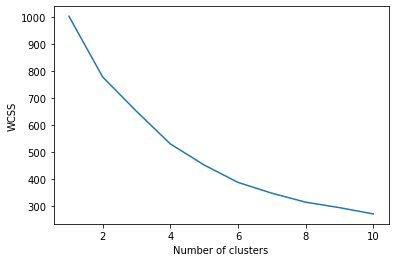

In [16]:
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [17]:
kmeans = KMeans(n_clusters = 4, init = "k-means++", random_state = 123)
y_kmeans = kmeans.fit_predict(data_scaled)
y_kmeans

array([0, 1, 0, 0, 1, 0, 1, 2, 2, 0, 2, 1, 0, 1, 1, 2, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       2, 0, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 0, 0, 0, 1,
       0, 1, 2, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 3, 1, 0, 0, 1, 1, 0, 3, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 0, 0, 1, 2, 2, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 3, 1, 1, 1, 0, 1, 2, 0, 1, 0, 1, 2, 2, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 2, 2, 1, 0, 1, 0, 1, 0, 0])

In [18]:
model = KMeans(n_clusters=4, random_state=123)
model.fit(data1)

KMeans(n_clusters=4, random_state=123)

In [19]:
# Add a new column to the original dataset
data['Cluster'] = model.labels_
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3


In [20]:
data.Cluster.value_counts()

1    110
3     29
0     24
2      4
Name: Cluster, dtype: int64

In [21]:
# Show the means of each feature from the describe function
clst_av = data.describe().iloc[1:2]
clst_av

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
mean,38.27006,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689,1.227545


In [22]:
#check the average values for each cluster.

clusters = data.groupby(['Cluster']).mean()
clusters

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Cluster,,,,,,,,,
0,4.983333,51.795833,9.107917,45.137500,44658.333333,2.728500,80.479167,1.825000,42458.333333
1,53.342727,34.043627,6.254364,45.873326,6669.663636,9.235764,66.650909,3.497091,3110.127273
2,4.875000,85.250000,7.640000,61.900000,83625.000000,4.216750,81.000000,1.792500,84425.000000
3,13.251724,52.975862,6.934138,50.127586,24937.931034,6.940724,75.713793,1.953793,16075.862069


In [23]:
#create a dataframe to compare each feature and cluster around the average for each cluster
checkclt = clusters.copy()
for i in range(0,4):
    for col in checkclt.columns:
        if checkclt[col][i]>=clst_av[col][0]:
            checkclt[col][i] = "Above"
        else:
            checkclt[col][i] = "Below"

checkclt

C:\Users\user\AppData\Local\Temp/ipykernel_332/3898862810.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  checkclt[col][i] = "Above"
F:\anaconda\New folder\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\user\AppData\Local\Temp/ipykernel_332/3898862810.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  checkclt[col][i] = "Below"

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Cluster,,,,,,,,,
0,Below,Above,Above,Below,Above,Below,Above,Below,Above
1,Above,Below,Below,Below,Below,Above,Below,Above,Below
2,Below,Above,Above,Above,Above,Below,Above,Below,Above
3,Below,Above,Above,Above,Above,Below,Above,Below,Above


Cluster 0: Child mortality: Low Exports: Above average Health spending per capita: Above average Imports: 
                    Average Income per capita: Above average Inflation: Below average Life expectancy: Above average Fertility:
                                    Below average GDPP: Above average

This cluster can be ticked off the list as not needing help

Cluster 1: Child mortality: VERY high Exports: Below average Health spending per capita: Below average Imports:
                    Average Income per capita: Below average Inflation: Above average Life expectancy: Below average Fertility:
                                    Above average GDPP: Above average

This cluster looks like it is a candidate for help

Cluster 2: Child mortality: Low Medium Exports: Above average Health spending per capita: Above average Imports: 
                    Above average Income per capita: Above average Inflation: Below average Life expectancy: 
                                Above average Fertility: Below average GDPP: Above average

This cluster is only a few countries and are not in need of help.

Cluster 3: Child mortality: Low Exports: Above average Health spending per capita: Average Imports:
                    Above average Income per capita: Above average Inflation: Below average Life expectancy:
                                Above average Fertility: Below average GDPP: Above average

This cluster would be second in line for help.


In [24]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3


In [25]:
data2=data.loc[data['Cluster']==1]['country'].to_list()

In [26]:
data2

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Armenia',
 'Azerbaijan',
 'Bangladesh',
 'Belarus',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Eritrea',
 'Fiji',
 'Gabon',
 'Gambia',
 'Georgia',
 'Ghana',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Jamaica',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kiribati',
 'Kyrgyz Republic',
 'Lao',
 'Lebanon',
 'Lesotho',
 'Liberia',
 'Macedonia, FYR',
 'Madagascar',
 'Malawi',
 'Malaysia',
 'Maldives',
 'Mali',
 'Mauritania',
 'Mauritius',
 'Micronesia, Fed. Sts.',
 'Moldova',
 'Mongolia',
 'Montenegro',
 'Morocco',
 'Mozambique',
 'Myanmar',
 'N